In [1]:
#Import essential libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Merge data from each month into one csv
import os
path = './sales_data'
files = [file for file in os.listdir(path)]
all_months_data = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data,current_data])
all_months_data.to_csv('all_data.csv',index=False)
print('All CSV files are merged in a single csv file')

All CSV files are merged in a single csv file


In [3]:
# read in updated data frame

all_data = pd.read_csv('all_data.csv')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
# clean up data
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
# drop the missing rows
all_data = all_data.dropna(how='all')

In [6]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
all_data.shape

(186305, 6)

In [8]:
# Get rid of text in 'Order Date' column
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [9]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [10]:
# Make columns correct type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [11]:
# add month column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int64')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


In [12]:
# Add sales column
all_data['Sales'] = all_data['Quantity Ordered'].astype('int')*all_data['Price Each'].astype('float')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99


In [14]:
# Q. what was the best month for sale ?
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


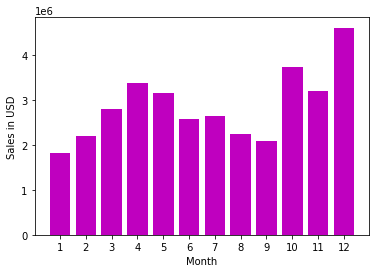

In [40]:
# Data Visualization
months = range(1,13)
plt.bar(months,all_data.groupby(['Month']).sum()['Sales'],color='m')
plt.xticks(months)
plt.xticks(rotation=360)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

In [31]:
# Add City Column
def get_city(address):
    return address.split(",")[1].strip("")
def get_state(address):
    return address.split(",")[2].split(" ")[1]

In [33]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x:f"{get_city(x)}({get_state(x)})")
all_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City(NY)
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin(TX)
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles(CA)
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle(WA)
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston(MA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles(CA)
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco(CA)
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco(CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco(CA)


In [41]:
# Q. What city sold the most product ?
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta(GA),16602,2.779908e+06,104794,2.795499e+06
Austin(TX),11153,1.809874e+06,69829,1.819582e+06
Boston(MA),22528,3.637410e+06,141112,3.661642e+06
Dallas(TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles(CA),33289,5.421435e+06,208325,5.452571e+06
New York City(NY),27932,4.635371e+06,175741,4.664317e+06
Portland(ME),2750,4.471893e+05,17144,4.497583e+05
Portland(OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco(CA),50239,8.211462e+06,315520,8.262204e+06


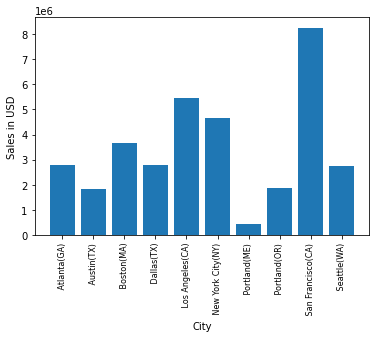

In [52]:
# plot a bar graph between sales and city

keys = [city for city,df in all_data.groupby(['City'])]
keys
plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.xticks(keys,rotation='vertical',size=8)
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.show()